# Participant
- Matheus Toledo


# Statement

```
O conjunto de dados (Fifa.zip) contém todas as partidas da Copa do Mundo FIFA 2022 do Catar.

Junto com os placares e as seleções, foram relatadas diversas estatísticas para cada partida; por exemplo, assistências, posse de bola, cruzamentos, número de cartões vermelhos e amarelos, passes, faltas, tentativas, mudanças de jogo, impedimentos e o número de vezes que uma determinada área do campo foi cruzada.

Sabendo desses dados, faça as seguintes análises:

- Análise descritiva das colunas;
- Os tipos de dados de cada coluna;
- Verificar se há valores vazios, caso exista preencher com a média;
- Quais times marcaram mais gols?
- Quais times tiveram mais assistências?
- Quais equipes tiveram o maior número total de tentativas de gol?
- Apresente gráficos para as questões 4, 5 e 6 com limite de 5 seleções..
```

# Code:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../data/Fifa_world_cup_matches.csv"

In [3]:
df  = pd.read_csv(path)

# Descriptive analysis of the data:

In [4]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"This dataframe has: {num_rows} rows.")
print(f"This dataframe has: {num_cols} columns.")


This dataframe has: 64 rows.
This dataframe has: 88 columns.


In [5]:
exist_nulls = df.isnull().any().any()

print("This dataframe has no null values on it." if not exist_nulls else "This dataframe has null values on it.")

This dataframe has no null values on it.


In [6]:
"""Displays info about each column in the dataframe, such as the name, the number of non-null values, and the type of data stored in it."""

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

None

In [7]:
"""Describes the whole dataset."""

display(df.describe())

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


# Which teams scored the most goals?

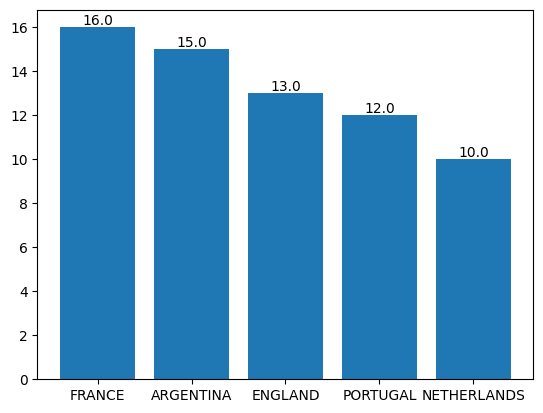

In [8]:
total_goals_team_1 = df[["team1", "number of goals team1"]].groupby(["team1"]).sum()
total_goals_team_2 = df[["team2", "number of goals team2"]].groupby(["team2"]).sum()


total_goals = total_goals_team_1.add(total_goals_team_2, fill_value=0)
total_goals["Total Goals"] = total_goals["number of goals team1"] + \
    total_goals["number of goals team2"]

total_goals.drop(columns=["number of goals team1","number of goals team2"], inplace=True)
total_goals.reset_index(inplace=True)
total_goals.rename(columns={"team1": "Team"}, inplace=True)

top_goals = total_goals.sort_values(by=["Total Goals"], ascending=False).head(5)

plt.bar(top_goals["Team"], top_goals["Total Goals"])

for i, v in enumerate(top_goals["Total Goals"]):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Which teams had the most assists?

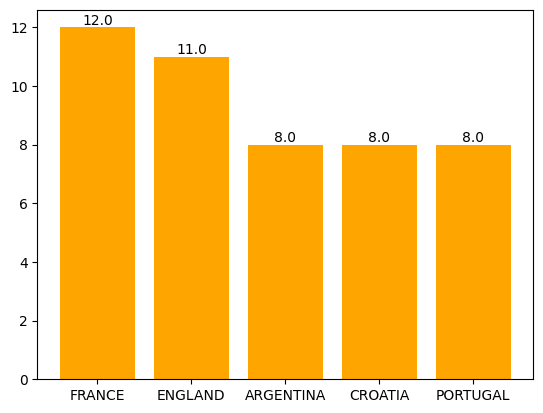

In [9]:
total_assists_team_1 = df[["team1","assists team1"]].groupby(["team1"]).sum()
total_assists_team_2 = df[["team2","assists team2"]].groupby(["team2"]).sum()

total_assistis = total_assists_team_1.add(total_assists_team_2, fill_value=0)

total_assistis["Total Assists"] = total_assistis["assists team1"] + total_assistis["assists team2"]

total_assistis.drop(columns=["assists team1", "assists team2"], inplace=True)
total_assistis.reset_index(inplace=True)
total_assistis.rename(columns={"team1": "Team"}, inplace=True)

top_assists = total_assistis.sort_values(by=["Total Assists"], ascending=False).head(5)

plt.bar(top_assists["Team"], top_assists["Total Assists"], color="orange")

for i, v in enumerate(top_assists["Total Assists"]):
    plt.text(i, v, str(v), ha="center", va="bottom")



# Which teams had the most goal attempts?

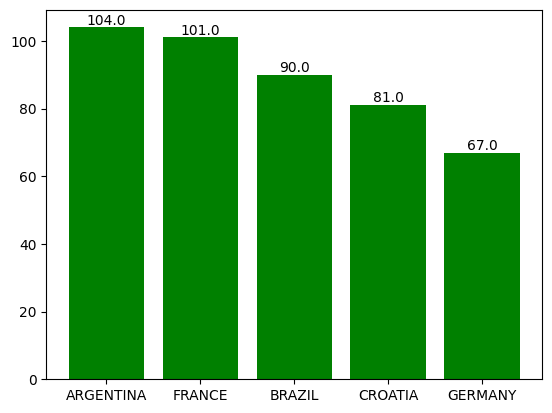

In [10]:
total_goal_at_team_1 = df[["team1","total attempts team1"]].groupby(["team1"]).sum()
total_goal_at_team_2 = df[["team2","total attempts team2"]].groupby(["team2"]).sum()

total_goal_at = total_goal_at_team_1.add(total_goal_at_team_2, fill_value=0)

total_goal_at["Total Attempts"] = total_goal_at["total attempts team1"] + total_goal_at["total attempts team2"]

total_goal_at.drop(columns=["total attempts team1", "total attempts team2"], inplace=True)
total_goal_at.reset_index(inplace=True)
total_goal_at.rename(columns={"team1": "Team"}, inplace=True)

top_goal_at = total_goal_at.sort_values(by=["Total Attempts"], ascending=False).head(5)

plt.bar(top_goal_at["Team"], top_goal_at["Total Attempts"], color="green")

for i, v in enumerate(top_goal_at["Total Attempts"]):
    plt.text(i, v, str(v), ha="center", va="bottom")